In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno

# Notes

## https://geohub.lacity.org/datasets/covid19-by-neighborhood
### Case Rate
Cases normalized by 100,000

### Cases
Total cases

### Death Rate
Deaths normalized by 100,000

### Deaths
Total deaths


### Potential neighborhood shapes
https://hub.arcgis.com/datasets/7b8a64cab4a44c0f86f12c909c5d7f1a_23/data?page=17
http://boundaries.latimes.com/set/la-county-neighborhoods-current/

### Problems
Data is not maintained as of 1/30/2021
Found a source that is:
https://raw.githubusercontent.com/ANRGUSC/lacounty_covid19_data/master/data/Covid-19.csv

Could webscrape weekly reports: 
- http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&prog=media&ou=ph&prid=2964&keywords=Public%20Health%20Reports&row=25&start=1
- http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&prog=media&ou=ph&prid=2954&keywords=Public%20Health%20Reports&row=25&start=1
- http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&prog=media&ou=ph&prid=2942&keywords=Public%20Health%20Reports&row=25&start=1

In [207]:
path = '/Users/kevinmarlis/Downloads/county_storage-2.csv'
df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

# Drop bad columns
df = df.drop(df[df.location  == 'CITY/COMMUNITY'].index)
df = df.drop(['OBJECTID'], axis=1)

# Fill missing values
df.loc[df['cases'] == '--', 'cases'] = 0
df.loc[df['case_rate'] == '--', 'case_rate'] = 0

df = df.fillna(0)
df[['deaths', 'death_rate', 'case_rate', 'cases']] = df[['deaths', 'death_rate', 'case_rate', 'cases']].apply(pd.to_numeric)

# Calculate daily counts of cases and deaths
df = df.sort_values(['location', 'Date'])
df['new_deaths'] = df.groupby([df.location]).deaths.diff(periods=1)
df['new_deaths_rate'] = df.groupby([df.location]).death_rate.diff(periods=1)
df['new_cases'] = df.groupby([df.location]).cases.diff(periods=1)
df['new_cases_rate'] = df.groupby([df.location]).case_rate.diff(periods=1)

df = df.fillna(0)

cols = ['Date', 'location', 'cases', 'case_rate', 'new_cases', 'new_cases_rate', 'deaths', 'death_rate', 'new_deaths', 'new_deaths_rate']
df = df[cols]

df.head()

,Date,location,cases,case_rate,new_cases,new_cases_rate,deaths,death_rate,new_deaths,new_deaths_rate
0,2020-04-15,CITY OF AGOURA HILLS,21,100.56,0.0,0.00,0,0.0,0.0,0.0
332,2020-04-16,CITY OF AGOURA HILLS,22,105.35,1.0,4.79,0,0.0,0.0,0.0
664,2020-04-17,CITY OF AGOURA HILLS,22,105.35,0.0,0.00,0,0.0,0.0,0.0
996,2020-04-18,CITY OF AGOURA HILLS,24,114.93,2.0,9.58,0,0.0,0.0,0.0
1328,2020-04-19,CITY OF AGOURA HILLS,24,114.93,0.0,0.00,0,0.0,0.0,0.0


In [160]:
neighborhoods = list(df.location.unique())
len(neighborhoods)

346

<AxesSubplot:>

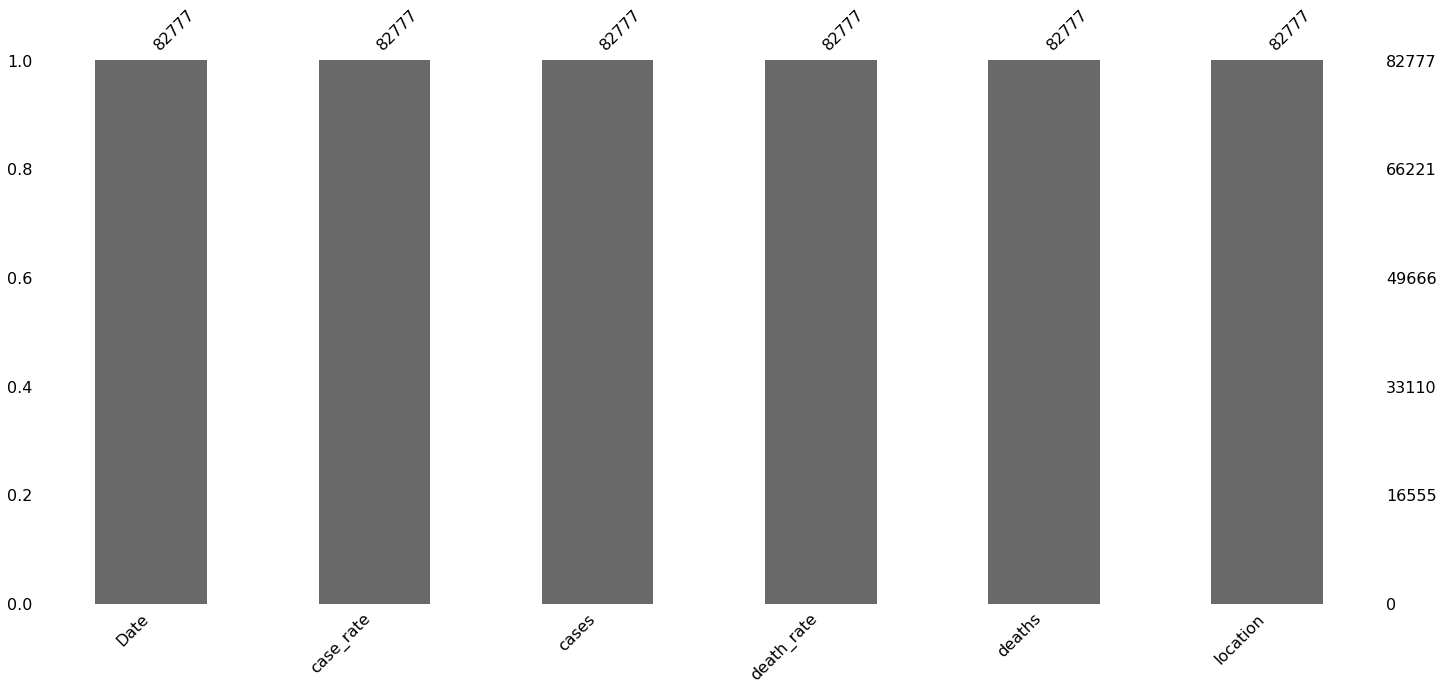

In [95]:
msno.bar(df)

In [ ]:
clean_df = pd.get_dummies(df, columns=['location'])
clean_df

In [198]:
df[df['new_deaths'] == 0]

,Date,location,cases,case_rate,new_cases,new_cases_rate,deaths,death_rate,new_deaths,new_deaths_rate
0,2020-04-15,CITY OF AGOURA HILLS,21,100.56,0.0,0.00,0,0.0,0.0,0.0
332,2020-04-16,CITY OF AGOURA HILLS,22,105.35,1.0,4.79,0,0.0,0.0,0.0
664,2020-04-17,CITY OF AGOURA HILLS,22,105.35,0.0,0.00,0,0.0,0.0,0.0
996,2020-04-18,CITY OF AGOURA HILLS,24,114.93,2.0,9.58,0,0.0,0.0,0.0
1328,2020-04-19,CITY OF AGOURA HILLS,24,114.93,0.0,0.00,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
81483,2021-01-26,UNINCORPORATED - WISEBURN,425,7052.00,5.0,83.00,7,116.0,0.0,0.0
81824,2021-01-27,UNINCORPORATED - WISEBURN,428,7101.00,3.0,49.00,7,116.0,0.0,0.0
82165,2021-01-28,UNINCORPORATED - WISEBURN,430,7135.00,2.0,34.00,7,116.0,0.0,0.0
82506,2021-01-29,UNINCORPORATED - WISEBURN,432,7168.00,2.0,33.00,7,116.0,0.0,0.0


In [206]:
df[df['new_deaths'] != 0]

,Date,location,cases,case_rate,new_cases,new_cases_rate,deaths,death_rate,new_deaths,new_deaths_rate
13261,2020-06-01,CITY OF AGOURA HILLS,35,167.6,0.0,0.0,1,4.79,1.0,4.79
32038,2020-07-29,CITY OF AGOURA HILLS,108,517.0,7.0,33.0,2,10.00,1.0,5.00
36131,2020-09-10,CITY OF AGOURA HILLS,155,742.0,-1.0,-5.0,1,5.00,-1.0,-5.00
44997,2020-10-06,CITY OF AGOURA HILLS,189,905.0,2.0,10.0,3,14.00,2.0,9.00
45338,2020-10-07,CITY OF AGOURA HILLS,191,915.0,2.0,10.0,4,19.00,1.0,5.00
...,...,...,...,...,...,...,...,...,...,...
72617,2020-12-31,UNINCORPORATED - WISEBURN,319,5293.0,8.0,133.0,3,50.00,1.0,17.00
74322,2021-01-05,UNINCORPORATED - WISEBURN,339,5625.0,0.0,0.0,4,66.00,1.0,16.00
74663,2021-01-06,UNINCORPORATED - WISEBURN,342,5674.0,3.0,49.0,5,83.00,1.0,17.00
75686,2021-01-09,UNINCORPORATED - WISEBURN,354,5874.0,6.0,100.0,6,100.00,1.0,17.00


In [205]:
df['new_deaths'].sum()

22532.0

In [217]:
print(len(df['location'].unique()))
df['location'].unique()

346


array(['CITY OF AGOURA HILLS', 'CITY OF ALHAMBRA', 'CITY OF ARCADIA',
       'CITY OF ARTESIA', 'CITY OF AVALON', 'CITY OF AZUSA',
       'CITY OF BALDWIN PARK', 'CITY OF BELL', 'CITY OF BELL GARDENS',
       'CITY OF BELLFLOWER', 'CITY OF BEVERLY HILLS', 'CITY OF BRADBURY',
       'CITY OF BURBANK', 'CITY OF CALABASAS', 'CITY OF CARSON',
       'CITY OF CERRITOS', 'CITY OF CLAREMONT', 'CITY OF COMMERCE',
       'CITY OF COMPTON', 'CITY OF COVINA', 'CITY OF CUDAHY',
       'CITY OF CULVER CITY', 'CITY OF DIAMOND BAR', 'CITY OF DOWNEY',
       'CITY OF DUARTE', 'CITY OF EL MONTE', 'CITY OF EL SEGUNDO',
       'CITY OF GARDENA', 'CITY OF GLENDALE', 'CITY OF GLENDORA',
       'CITY OF HAWAIIAN GARDENS', 'CITY OF HAWTHORNE',
       'CITY OF HERMOSA BEACH', 'CITY OF HIDDEN HILLS',
       'CITY OF HUNTINGTON PARK', 'CITY OF INDUSTRY', 'CITY OF INGLEWOOD',
       'CITY OF IRWINDALE', 'CITY OF LA CANADA FLINTRIDGE',
       'CITY OF LA HABRA HEIGHTS', 'CITY OF LA MIRADA',
       'CITY OF LA PUE

In [218]:
df.to_csv('Neighborhood_Covid_2020.csv')